In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Step 1: Open dataset and only select those faces for which we have 70 or more images.

In [3]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=70, resize = 0.4, data_home='datasets')

## Step 2: Print a few of the faces to familiarized yourself with the data.

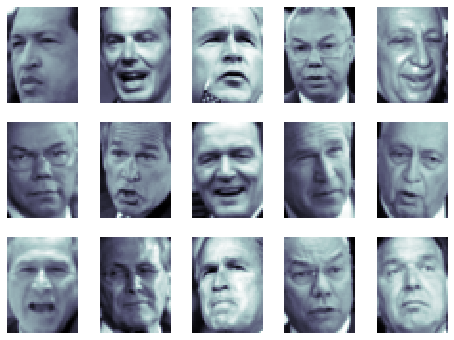

In [4]:
fig = plt.figure(figsize=(8,6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw.images[i], cmap=plt.cm.bone)

## Step 3: Graph the different labels vs their count.

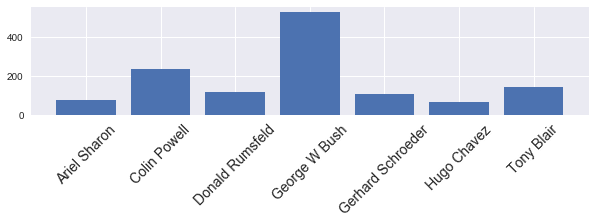

In [7]:
plt.figure(figsize=(10, 2))
unique_targets = np.unique(lfw.target)
counts = [(lfw.target == i).sum() for i in unique_targets]
plt.xticks(unique_targets, lfw.target_names[unique_targets])
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, size=14)
_ = plt.bar(unique_targets, counts)

## Step 4: Notice that the number of features in our dataset is fairly large. This is a good moment to apply PCA to reduce the dimensionality of our dataset. Lets choose 150 components.

In [11]:
lfw.data.shape

(1288, 1850)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(lfw.data, lfw.target, random_state=0)

In [13]:
x_train.shape

(966, 1850)

In [14]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

## Step 5: A really cool thing about PCA is that it lets you compute the mean of each entry which we can then use to obtain the 'average' face in our dataset.

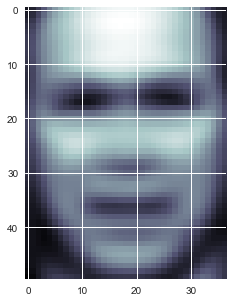

In [17]:
plt.imshow(pca.mean_.reshape((50,37)), cmap=plt.cm.bone)

## Step 6: Plot the components of the PCA. Notice that these are always ordered by importance.

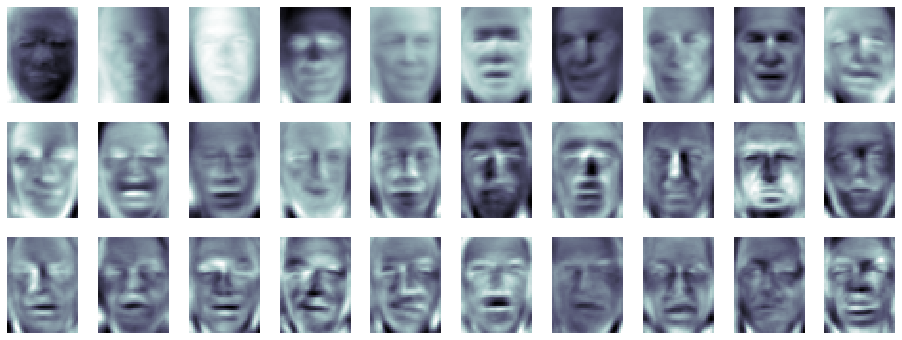

In [18]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap=plt.cm.bone)

# Exercise 2:

### Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)
lr.score(x_test_pca, y_test)

0.77018633540372672

### kNeighbors Classifier

In [27]:
scores = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train)
    score = knn.score(x_test_pca, y_test)
    scores.append(error)
    print('For k = {} the score rate is {:.3f}'.format(k, score))

For k = 1 the score rate is 0.627
For k = 2 the score rate is 0.665
For k = 3 the score rate is 0.680
For k = 4 the score rate is 0.686
For k = 5 the score rate is 0.689
For k = 6 the score rate is 0.674
For k = 7 the score rate is 0.680
For k = 8 the score rate is 0.680
For k = 9 the score rate is 0.665
For k = 10 the score rate is 0.661
For k = 11 the score rate is 0.652
For k = 12 the score rate is 0.640
For k = 13 the score rate is 0.643
For k = 14 the score rate is 0.630
For k = 15 the score rate is 0.612
For k = 16 the score rate is 0.599
For k = 17 the score rate is 0.590
For k = 18 the score rate is 0.587
For k = 19 the score rate is 0.571


### Linear Discriminant

In [28]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_pca, y_train)
lda.score(x_test_pca, y_test)

0.83229813664596275

### Naive Bayes

In [29]:
nb = GaussianNB()
nb.fit(x_train_pca, y_train)
nb.score(x_test_pca, y_test)

0.69565217391304346

In [30]:
# Adding QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train_pca, y_train)
qda.score(x_test_pca, y_test)

/Users/mac/anaconda/envs/venv/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.4254658385093168

### Part 2: Which one had the best performance? Which one had the worst performance?

LDA has the best performance followed by logistic regression, NB, KNN and QDA

### Part 3: Any idea why the score on the top two differs so drastically from the last two?

It could be that this is more linearity in the data that is being picked up by the two linear models of LDA and LR.

### Part 4: Find the log_loss, precision, recall, f_score of the best model.

In [31]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss

In [32]:
log_loss(y_test, lda.predict_proba(x_test_pca))

0.69074816021083174

In [34]:
precision_recall_fscore_support(y_test, lda.predict(x_test_pca), average='weighted')

(0.83793563078762134, 0.83229813664596275, 0.83192363469644748, None)

### Part 5: Plot the Confusion Matrix of the best model.

Confusion Matrix


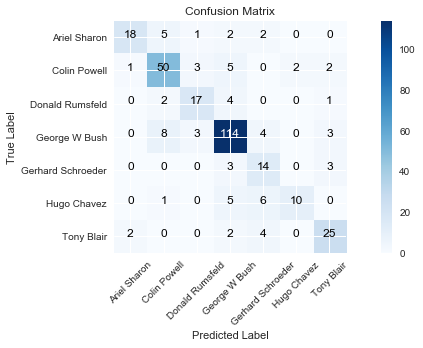

In [37]:
import itertools
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test_pca)
class_names = lfw.target_names

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    print('Confusion Matrix')
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i , cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
        
        plt.tight_layout()
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix')

plt.show()

## Part 6 (optional): Edit the code from *Step 2* to display not only the image but also the label and color code the label in red if your model got it wrong or black if it got it right.

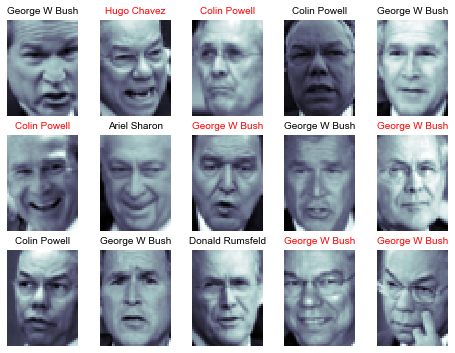

In [38]:
fig = plt.figure(figsize=(8,6))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape((50,37)), cmap=plt.cm.bone)
    y_pred = lr.predict(x_test_pca[i].reshape(1,-1))[0]
    color = 'black' if y_pred == np.array(y_test[i]) else 'red'
    ax.set_title(lfw.target_names[y_pred], fontsize='small', color=color)